In [1]:
from src import visualization as vis
from src import pre_process
from src import cnn

import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def napari():
    vis.visualize_images("D:/TFM/Microscopy/video/3288-1.czi")
    vis.napari_view_splited_channels()

# napari()

In [3]:
# 1. Creation of dataframes for each channel independently and all together
blue_df, green_df, red_df, df = pre_process.create_df("D:/TFM/Microscopy/video/copies/channels/")

def save_df(df_list, path_list, index = True):
    for df, path in zip(df_list, path_list): 
        df.to_csv(path, index = index)
        print(f'Dataframe has been saved to {path}')

df_list = [blue_df, green_df, red_df, df]
path_list = ["C:/Users/saraa/TFM/Microscopy/data/blue","C:/Users/saraa/TFM/Microscopy/data/green", "C:/Users/saraa/TFM/Microscopy/data/red","C:/Users/saraa/TFM/Microscopy/data/rgb"]
save_df(df_list, path_list)

['D:/TFM/Microscopy/video/copies/channels/blue', 'D:/TFM/Microscopy/video/copies/channels/green', 'D:/TFM/Microscopy/video/copies/channels/red']
Dataframe has been saved to C:/Users/saraa/TFM/Microscopy/data/blue
Dataframe has been saved to C:/Users/saraa/TFM/Microscopy/data/green
Dataframe has been saved to C:/Users/saraa/TFM/Microscopy/data/red
Dataframe has been saved to C:/Users/saraa/TFM/Microscopy/data/rgb


In [4]:
green_df

,File_path,Image_id,Channel,Sample,Duplicates,Timepoints,Label
0,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0000,green,3288,1,0,1
1,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0001,green,3288,1,1,1
2,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0002,green,3288,1,2,1
3,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0003,green,3288,1,3,1
4,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0004,green,3288,1,4,1
...,...,...,...,...,...,...,...
196,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0196,green,3288,1,196,1
197,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0197,green,3288,1,197,1
198,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0198,green,3288,1,198,1
199,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0199,green,3288,1,199,1


In [5]:
def masks_df(input_stack, type, output_df):
    # 2. Generate masks for each microscopy image stack 
    cnn.mask(input_stack, type)
    # 3. Generate mask dataframe
    maskdf = pre_process.mask_df(output_df)
    return maskdf

input_stack = "D:\\TFM\\Microscopy\\video\\3288-1-AP-OP.czi"
type = "czi"
output_df = 'C:/Users/saraa/TFM/mask/nuclei/'
nucleiM = masks_df(input_stack, type, output_df)

(1, 201, 3, 1, 940, 940, 1)


100%|██████████| 603/603 [00:54<00:00, 11.11it/s]


In [6]:
red = red_df.drop(columns = ["Sample", "Duplicates"])
red


,File_path,Image_id,Channel,Timepoints,Label
0,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0000,red,0,0
1,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0001,red,1,0
2,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0002,red,2,0
3,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0003,red,3,0
4,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0004,red,4,0
...,...,...,...,...,...
196,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0196,red,196,0
197,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0197,red,197,0
198,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0198,red,198,0
199,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0199,red,199,0


In [7]:
df_list = [nucleiM]
path_list = ["C:/Users/saraa/TFM/Microscopy/data/nucleiM"]
save_df(df_list, path_list)

Dataframe has been saved to C:/Users/saraa/TFM/Microscopy/data/nucleiM


In [8]:
Xtrain, Xtest, Ytrain, Ytest = pre_process.train_valid_split(red, nucleiM)

In [9]:
Xtrain[Xtrain["Timepoints"]==92]

,File_path,Image_id,Channel,Timepoints,Label
92,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0092,red,92,0


In [10]:
Ytrain

,File_path,Image_id,Channel,Timepoint,Label
66,C:/Users/saraa/TFM/mask/nuclei/nuclei_mask_66.png,nuclei_mask_66,red,66,0
26,C:/Users/saraa/TFM/mask/nuclei/nuclei_mask_26.png,nuclei_mask_26,red,26,0
113,C:/Users/saraa/TFM/mask/nuclei/nuclei_mask_113...,nuclei_mask_113,red,113,0
168,C:/Users/saraa/TFM/mask/nuclei/nuclei_mask_168...,nuclei_mask_168,red,168,0
63,C:/Users/saraa/TFM/mask/nuclei/nuclei_mask_63.png,nuclei_mask_63,red,63,0
...,...,...,...,...,...
67,C:/Users/saraa/TFM/mask/nuclei/nuclei_mask_67.png,nuclei_mask_67,red,67,0
192,C:/Users/saraa/TFM/mask/nuclei/nuclei_mask_192...,nuclei_mask_192,red,192,0
117,C:/Users/saraa/TFM/mask/nuclei/nuclei_mask_117...,nuclei_mask_117,red,117,0
47,C:/Users/saraa/TFM/mask/nuclei/nuclei_mask_47.png,nuclei_mask_47,red,47,0


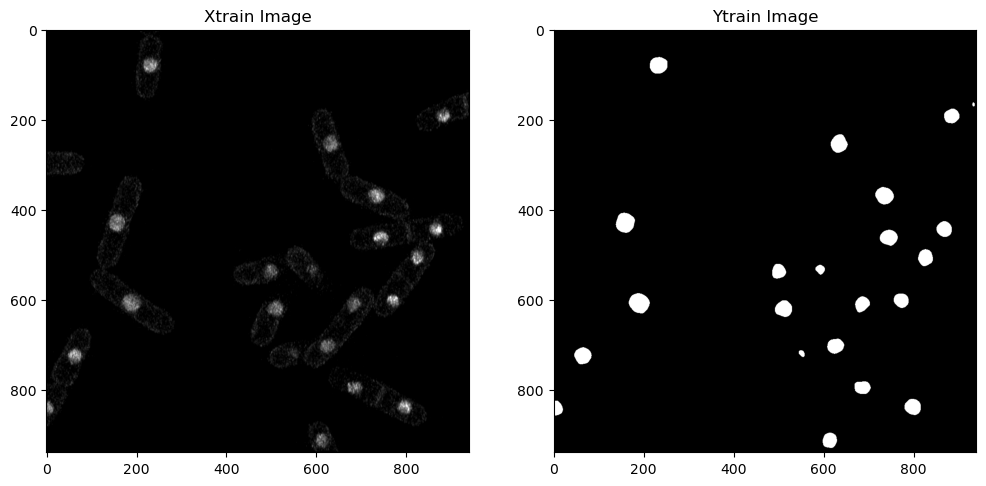

In [11]:
pre_process.plot_training_data(Xtrain, Ytrain)

In [12]:
def split_shutil_train_val():
    # 1. Creating folders 
    data_path = "D:/TFM/Microscopy/video/copies/img/"
    folder_names= ["train_folder", "val_folder"]
    pre_process.createfolders(data_path,folder_names)

    data_path = "D:/TFM/Microscopy/video/copies/masks/"
    folder_names= ["train_folder", "val_folder"]
    pre_process.createfolders(data_path,folder_names)
    
    # 2. Splitting images data
    import shutil
    dfs = [Xtrain, Xtest]
    paths = ["D:/TFM/Microscopy/video/copies/img/train_folder/", "D:/TFM/Microscopy/video/copies/img/val_folder/"]
    for path, df in zip(paths, dfs):
        try: 
            pre_process.move_images(df, path)
        except shutil.Error:
            print(f"The files already exist in the destination path: {path}")
    
    # 3. Splitting masks data
    dfs = [Ytrain, Ytest]
    paths = ["D:/TFM/Microscopy/video/copies/masks/train_folder/", "D:/TFM/Microscopy/video/copies/masks/val_folder/"]
    for path, df in zip(paths, dfs):
        try: 
            pre_process.move_images(df, path)
        except shutil.Error:
            print(f"The files already exist in the destination path: {path}")  

# split_shutil_train_val()

In [13]:
def create_shutil_labels():
    # 1. Creating folders 
    train_path = "D:/TFM/Microscopy/video/copies/img/train_folder"
    val_path = "D:/TFM/Microscopy/video/copies/img/val_folder"
    # folder_names= ["red", "green", "blue"]
    folder_names= ["red"]
    pre_process.createfolders(train_path,folder_names)
    pre_process.createfolders(val_path,folder_names)

    train_path = "D:/TFM/Microscopy/video/copies/masks/train_folder"
    val_path = "D:/TFM/Microscopy/video/copies/masks/val_folder"
    # folder_names= ["red", "green", "blue"]
    folder_names= ["red"]
    pre_process.createfolders(train_path,folder_names)
    pre_process.createfolders(val_path,folder_names)
    
    # 2. Creating labels for training and testing data
    Xtrain["new_file_path"] = "D:/TFM/Microscopy/video/copies/img/train_folder/" + Xtrain["Image_id"] + ".tif"
    Xtrain["new_file_path"] = Xtrain["new_file_path"].astype(str)
    Xtest["new_file_path"] = "D:/TFM/Microscopy/video/copies/img/val_folder/" + Xtest["Image_id"] + ".tif"
    Xtest["new_file_path"] = Xtest["new_file_path"].astype(str)
    
    Ytrain["new_file_path"] = "D:/TFM/Microscopy/video/copies/masks/train_folder/" + Ytrain["Image_id"] + ".png"
    Ytrain["new_file_path"] = Ytrain["new_file_path"].astype(str)
    Ytest["new_file_path"] = "D:/TFM/Microscopy/video/copies/masks/val_folder/" + Ytest["Image_id"] + ".png"
    Ytest["new_file_path"] = Ytest["new_file_path"].astype(str)
    
    # 3. Save dataframe
    Xtrain.to_csv("C:/Users/saraa/TFM/Microscopy/data/img_training", index = True)
    Xtest.to_csv("C:/Users/saraa/TFM/Microscopy/data/img_testing", index = True)
    Ytrain.to_csv("C:/Users/saraa/TFM/Microscopy/data/mask_training", index = True)
    Ytest.to_csv("C:/Users/saraa/TFM/Microscopy/data/mask_testing", index = True)

    # 4. Splitting data for images 
    img_train_path_red = "D:/TFM/Microscopy/video/copies/img/train_folder/red"
    # train_path_green = "D:/TFM/Microscopy/video/copies/train_folder/green"
    # train_path_blue = "D:/TFM/Microscopy/video/copies/train_folder/blue"
    pre_process.images_class(Xtrain, img_train_path_red)    

    img_val_path_red = "D:/TFM/Microscopy/video/copies/img/val_folder/red"
    # val_path_green = "D:/TFM/Microscopy/video/copies/val_folder/green"
    # val_path_blue = "D:/TFM/Microscopy/video/copies/val_folder/blue"
    pre_process.images_class(Xtest, img_val_path_red)

    # 5. Splitting data for masks
    mask_train_path_red = "D:/TFM/Microscopy/video/copies/masks/train_folder/red"
    # train_path_green = "D:/TFM/Microscopy/video/copies/train_folder/green"
    # train_path_blue = "D:/TFM/Microscopy/video/copies/train_folder/blue"
    pre_process.images_class(Ytrain, mask_train_path_red)    

    mask_val_path_red = "D:/TFM/Microscopy/video/copies/masks/val_folder/red"
    # val_path_green = "D:/TFM/Microscopy/video/copies/val_folder/green"
    # val_path_blue = "D:/TFM/Microscopy/video/copies/val_folder/blue"
    pre_process.images_class(Ytest, mask_val_path_red)

# create_shutil_labels()    

In [14]:
from src import cnn, pre_process
from keras.layers import Input
from keras.optimizers import Adam

img_train_path = "D:/TFM/Microscopy/video/copies/img/train_folder/"
img_val_path = "D:/TFM/Microscopy/video/copies/img/val_folder/"
mask_train_path = "D:/TFM/Microscopy/video/copies/masks/train_folder/"
mask_val_path = "D:/TFM/Microscopy/video/copies/masks/val_folder/"

img_gen, valid_img_gen, mask_gen, valid_mask_gen = pre_process.get_generator(img_train_path, img_val_path, 
                                                                             mask_train_path, mask_val_path)

Found 160 images belonging to 1 classes.
Found 41 images belonging to 1 classes.
Found 160 images belonging to 1 classes.
Found 41 images belonging to 1 classes.


In [15]:
from src import cnn, pre_process
from keras.layers import Input
from keras.optimizers import Adam

img_train_path = "D:/TFM/Microscopy/video/copies/img/train_folder/"
img_val_path = "D:/TFM/Microscopy/video/copies/img/val_folder/"
mask_train_path = "D:/TFM/Microscopy/video/copies/masks/train_folder/"
mask_val_path = "D:/TFM/Microscopy/video/copies/masks/val_folder/"

img_gen, valid_img_gen, mask_gen, valid_mask_gen = pre_process.get_generator(img_train_path, img_val_path, 
                                                                             mask_train_path, mask_val_path)

Found 160 images belonging to 1 classes.
Found 41 images belonging to 1 classes.
Found 160 images belonging to 1 classes.
Found 41 images belonging to 1 classes.


In [16]:
train_generator =  pre_process.combine_generators(img_gen, mask_gen)
valid_generator = pre_process.combine_generators(valid_img_gen, valid_mask_gen)

In [17]:
# 1. Initialize the model 
input_shape = (928, 928, 3) # Height and Weight has to be multiples of 16
                            # Also three channels, because the CNN expects an 
                            # RGB image 
model = cnn.build_unet(input_shape)

# 2. See model architecture
model.compile(optimizer = Adam(lr = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 928, 928, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 928, 928, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 928, 928, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [18]:
steps_per_epoch = 3*(len(Xtrain))//8
history = model.fit(train_generator, 
                               steps_per_epoch=steps_per_epoch, 
                               validation_data=None, 
                               validation_steps=None, 
                               epochs=1)

InvalidArgumentError: Graph execution error:

Detected at node 'U-Net/conv2d/BiasAdd' defined at (most recent call last):
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\ipykernel\kernelapp.py", line 701, in start
      self.io_loop.start()
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\asyncio\windows_events.py", line 321, in run_forever
      super().run_forever()
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue
      await self.process_one()
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one
      await dispatch(*args)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell
      await result
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request
      reply_content = await reply_content
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute
      res = shell.run_cell(
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\saraa\AppData\Local\Temp\ipykernel_372\2059418335.py", line 2, in <module>
      history = model.fit(train_generator,
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\tfm\lib\site-packages\keras\layers\convolutional\base_conv.py", line 304, in call
      outputs = tf.nn.bias_add(
Node: 'U-Net/conv2d/BiasAdd'
output depth must be evenly divisible by number of groups: 64 vs 3
	 [[{{node U-Net/conv2d/BiasAdd}}]] [Op:__inference_train_function_5345]